In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [281]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [282]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [283]:
### Your code is here
### Посмотрим на некатегориальные колонки

numeric_columns = df.loc[:,df.dtypes != object].columns
df.loc[:,df.dtypes != object].head(2)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_ID,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.905,0,40.0,46,60,2
T0005689461,29.47,10.0,2.78245,3.450,0,38.0,56,78,2


In [284]:
### Посмотрим на категориальные колонки

categorical_columns = df.loc[:,df.dtypes==object].columns
df.loc[:,df.dtypes==object].head(2)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005689460,B,A,A,Female
T0005689461,B,B,A,Male


In [285]:
### Есть ли пропуски?

df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [286]:
### Заполним средним

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [287]:
### Заполним  пропуски самым популярным классом

for col in categorical_columns:
    most_recent = df.groupby(col).size().sort_values().index[-1]
    df[col] = df[col].fillna(most_recent)

df.describe(include='object')

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,131662,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,51346,60548,77597,93900


In [288]:
df[numeric_columns].isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
Surge_Pricing_Type          0
dtype: int64

In [289]:
### Изучим корелляции вещественных признаков

df[numeric_columns].corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.114340,0.468367,-0.054654,-0.007686,-0.030662,0.200456,0.231706,0.135928
Customer_Since_Months,0.114340,1.000000,0.119154,-0.049001,-0.006187,-0.006700,0.041766,0.110830,0.027202
Life_Style_Index,0.468367,0.119154,1.000000,0.189173,0.068176,-0.055873,0.215921,0.303296,-0.073682
Customer_Rating,-0.054654,-0.049001,0.189173,1.000000,0.003595,-0.007400,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006187,0.068176,0.003595,1.000000,0.007550,0.095830,0.128686,0.185646
Var1,-0.030662,-0.006700,-0.055873,-0.007400,0.007550,1.000000,-0.031712,-0.041235,-0.026302
Var2,0.200456,0.041766,0.215921,-0.302968,0.095830,-0.031712,1.000000,0.683437,0.003437
Var3,0.231706,0.110830,0.303296,-0.227531,0.128686,-0.041235,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027202,-0.073682,-0.155279,0.185646,-0.026302,0.003437,-0.039309,1.000000


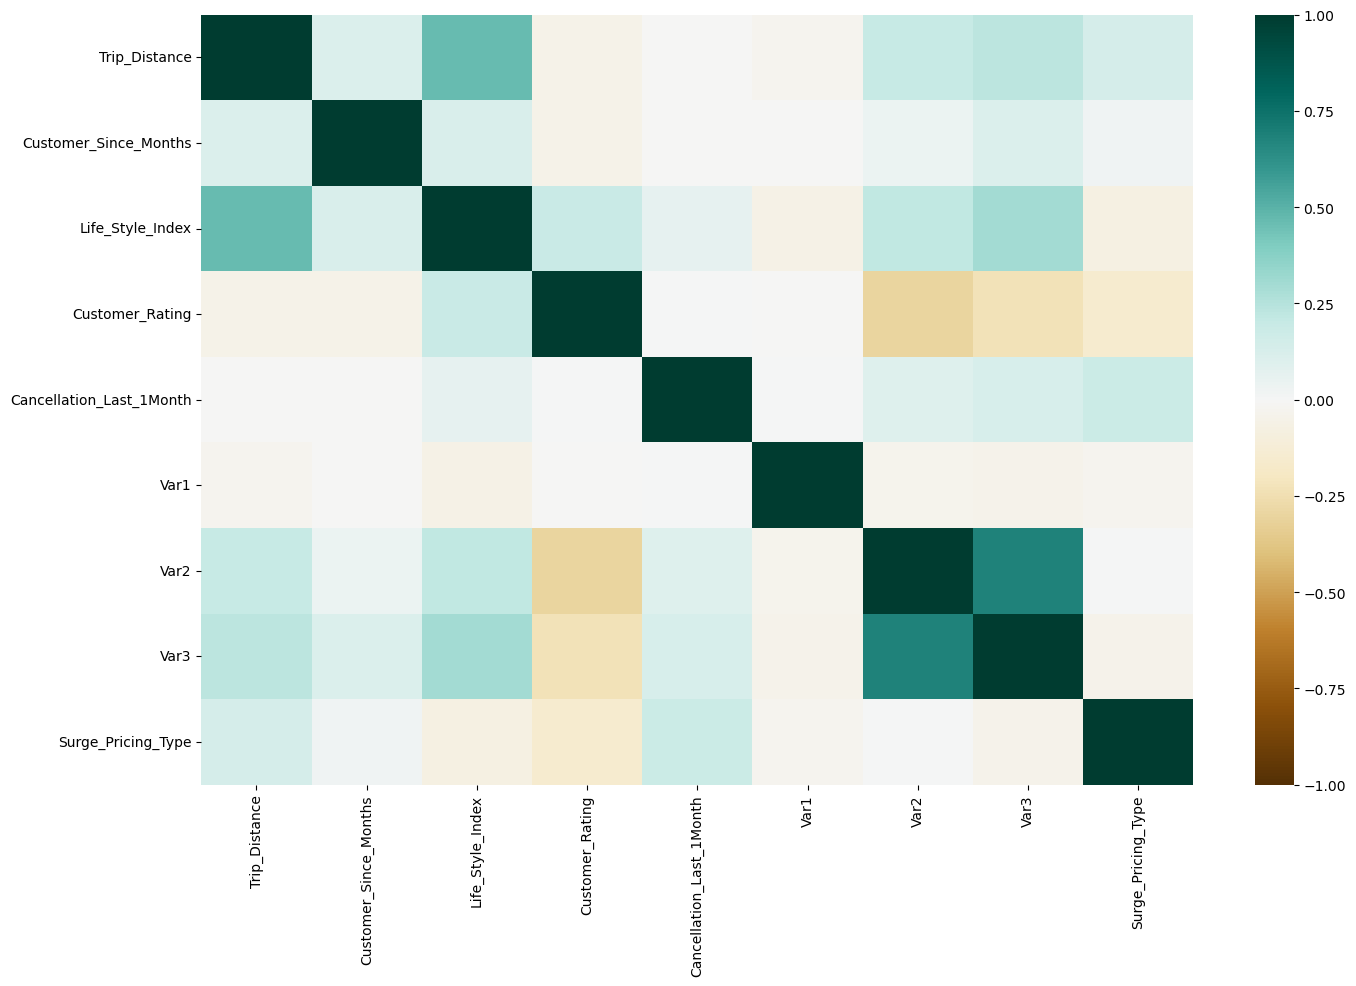

In [290]:
	
### Изобразим в виде Тепловой карты

import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [291]:
### Секретные функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 5))

Top Absolute Correlations
Var2              Var3                0.683437
Trip_Distance     Life_Style_Index    0.468367
Life_Style_Index  Var3                0.303296
Customer_Rating   Var2                0.302968
Trip_Distance     Var3                0.231706
dtype: float64


In [292]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold


cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])

cutter.get_feature_names_out()

array(['Trip_Distance', 'Customer_Since_Months', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'], dtype=object)

In [293]:
numeric_columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [294]:
for col in categorical_columns:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)     
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

In [295]:
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.427690,3.90500,0,40.000000,46,60,2,True,...,False,False,False,False,False,False,False,False,False,False
T0005689461,29.47,10.0,2.782450,3.45000,0,38.000000,56,78,2,True,...,False,False,False,False,False,False,False,False,False,True
T0005689464,41.58,10.0,2.802064,3.50125,2,64.202698,56,77,2,True,...,False,False,False,False,False,False,False,False,False,True
T0005689465,61.56,10.0,2.802064,3.45375,0,64.202698,52,74,3,False,...,False,False,False,False,False,False,False,False,False,True
T0005689467,54.95,10.0,3.034530,3.40250,4,51.000000,49,102,2,False,...,False,False,False,False,False,False,False,False,False,True


### Training

In [296]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [297]:
X = df.drop(['Surge_Pricing_Type'], axis=1)
y = df['Surge_Pricing_Type']

In [298]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [299]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

### Your code is here
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_all', OneVsRestClassifier(LogisticRegression()))
])
                    
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [300]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"""Precision равно: {precision_score(y_test, 
                                            pipe.predict(X_test), 
                                            average='micro'):.3f}""" )

print(f"""Recall равно: {recall_score(y_test,
                                      pipe.predict(X_test),
                                      average='macro'):.3f}""" )

print(f"""F-мера равно: {f1_score(y_test, 
                                  pipe.predict(X_test),
                                  average='weighted'):.3f}""" )

Precision равно: 0.679
Recall равно: 0.649
F-мера равно: 0.673


In [301]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.722     0.542     0.619      5372
           2      0.636     0.835     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [302]:
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [303]:
### Your code is here
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(estimator = pipe, param_grid = param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.68076):
{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}


In [304]:
best_model = search.best_estimator_

In [305]:
print(classification_report(y_test, best_model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.741     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.575     0.648      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [306]:
### Your code is here

best_model.predict_proba(X_test)

array([[0.32585275, 0.2710536 , 0.40309366],
       [0.02345353, 0.5410115 , 0.43553497],
       [0.02308634, 0.55731882, 0.41959484],
       ...,
       [0.48759188, 0.10515378, 0.40725434],
       [0.56508849, 0.18020472, 0.25470679],
       [0.13229742, 0.60029245, 0.26741014]])

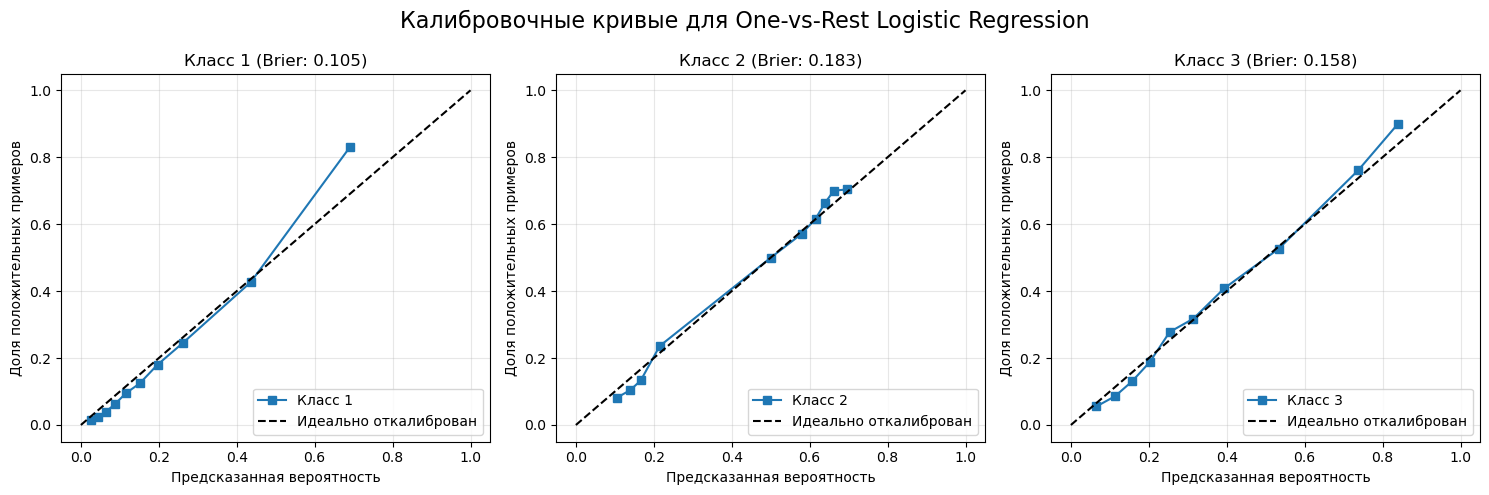

In [307]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import numpy as np

# Получаем предсказанные вероятности для всех классов
y_proba = best_model.predict_proba(X_test)

# Создаем subplot для трех кривых
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Калибровочные кривые для One-vs-Rest Logistic Regression', fontsize=16)

# Для каждого класса строим калибровочную кривую
for i, class_label in enumerate(best_model.classes_):
    # Бинаризируем целевые переменные для текущего класса
    y_true_binary = (y_test == class_label).astype(int)
    
    # Получаем вероятности для текущего класса
    y_proba_class = y_proba[:, i]
    
    # Вычисляем калибровочную кривую
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true_binary, y_proba_class, n_bins=10, strategy='quantile'
    )
    
    # Вычисляем Brier score
    brier_score = brier_score_loss(y_true_binary, y_proba_class)
    
    # Строим график
    ax = axes[i]
    ax.plot(mean_predicted_value, fraction_of_positives, "s-", label=f'Класс {class_label}')
    ax.plot([0, 1], [0, 1], "k--", label="Идеально откалиброван")
    ax.set_xlabel('Предсказанная вероятность')
    ax.set_ylabel('Доля положительных примеров')
    ax.set_title(f'Класс {class_label} (Brier: {brier_score:.3f})')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [308]:
### Создание полиномиальных признаков

X_polinomial = X.copy()


### Your code is here
### Попробуем улучшить модель полиномиальными фичами


for col in numeric_columns.drop(['Surge_Pricing_Type']):
    for power in [2, 3, 4]:
        
        to_add = (X_polinomial[col]**power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)
X_polinomial.head()        

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Cancellation_Last_1Month_4,Var1_2,Var1_3,Var1_4,Var2_2,Var2_3,Var2_4,Var3_2,Var3_3,Var3_4
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.427690,3.90500,0,40.000000,46,60,True,False,...,0,1600.000000,64000.000000,2.560000e+06,2116,97336,4477456,3600,216000,12960000
T0005689461,29.47,10.0,2.782450,3.45000,0,38.000000,56,78,True,False,...,0,1444.000000,54872.000000,2.085136e+06,3136,175616,9834496,6084,474552,37015056
T0005689464,41.58,10.0,2.802064,3.50125,2,64.202698,56,77,True,False,...,16,4121.986462,264642.652988,1.699077e+07,3136,175616,9834496,5929,456533,35153041
T0005689465,61.56,10.0,2.802064,3.45375,0,64.202698,52,74,False,True,...,0,4121.986462,264642.652988,1.699077e+07,2704,140608,7311616,5476,405224,29986576
T0005689467,54.95,10.0,3.034530,3.40250,4,51.000000,49,102,False,True,...,256,2601.000000,132651.000000,6.765201e+06,2401,117649,5764801,10404,1061208,108243216


In [309]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [310]:
### Your code is here

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_all', OneVsRestClassifier(LogisticRegression(C = 0.001, penalty = 'l2')))
])
                    
pipe.fit(X_pol_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [311]:
print(classification_report(y_test, pipe.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.740     0.585     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

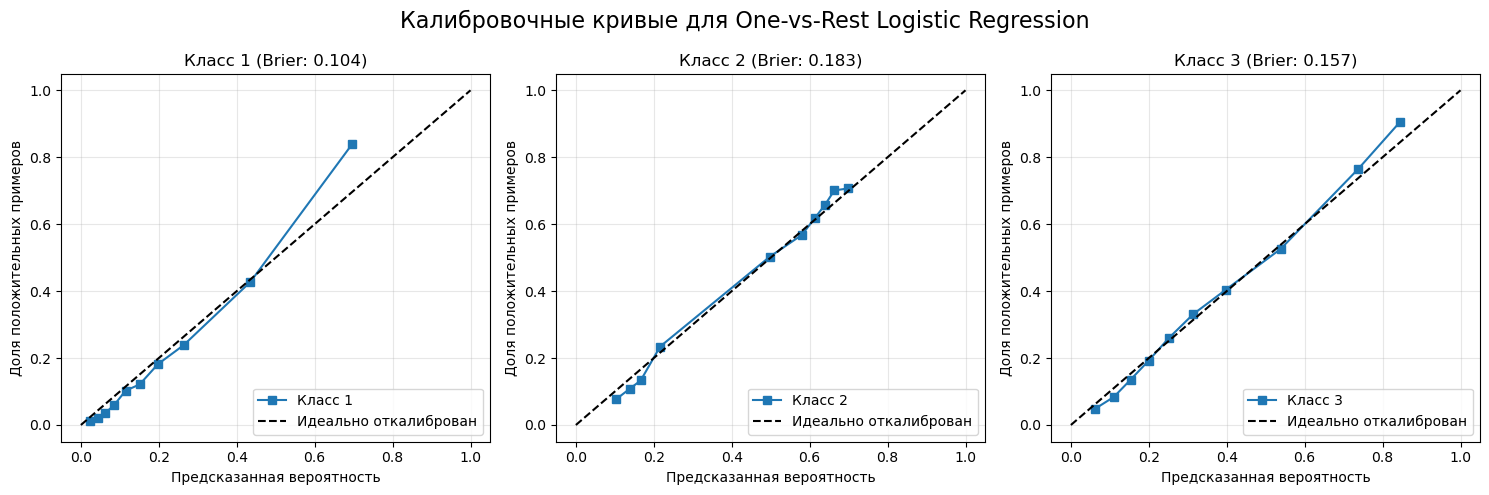

In [312]:
### Your code is here

# Получаем предсказанные вероятности для всех классов
y_proba = pipe.predict_proba(X_pol_test)

# Создаем subplot для трех кривых
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Калибровочные кривые для One-vs-Rest Logistic Regression', fontsize=16)

# Для каждого класса строим калибровочную кривую
for i, class_label in enumerate(best_model.classes_):
    # Бинаризируем целевые переменные для текущего класса
    y_true_binary = (y_test == class_label).astype(int)
    
    # Получаем вероятности для текущего класса
    y_proba_class = y_proba[:, i]
    
    # Вычисляем калибровочную кривую
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true_binary, y_proba_class, n_bins=10, strategy='quantile'
    )
    
    # Вычисляем Brier score
    brier_score = brier_score_loss(y_true_binary, y_proba_class)
    
    # Строим график
    ax = axes[i]
    ax.plot(mean_predicted_value, fraction_of_positives, "s-", label=f'Класс {class_label}')
    ax.plot([0, 1], [0, 1], "k--", label="Идеально откалиброван")
    ax.set_xlabel('Предсказанная вероятность')
    ax.set_ylabel('Доля положительных примеров')
    ax.set_title(f'Класс {class_label} (Brier: {brier_score:.3f})')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [313]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [314]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here

pipe_all_one = Pipeline([("scaler", StandardScaler()),
                         ("one_vs_one", OneVsOneClassifier(SGDClassifier(loss='log_loss')))])

pipe_all_one.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_one',
                 OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [315]:
print(classification_report(y_test, pipe_all_one.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.718     0.545     0.620      5372
           2      0.636     0.812     0.713     11349
           3      0.729     0.590     0.652      9612

    accuracy                          0.676     26333
   macro avg      0.694     0.649     0.662     26333
weighted avg      0.687     0.676     0.672     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [316]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [317]:
### Your code is here

grid_search = GridSearchCV(pipe_all_one, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one',
                                        OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss')))]),
             param_grid={'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1],
                         'one_vs_one__estimator__loss': ['hinge', 'log',
                                                         'modified_huber'],
                         'one_vs_one__estimator__penalty': ['l1', 'l2']})

In [318]:
print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy на кросс-валидации: {grid_search.best_score_:.3f}")


Лучшие параметры: {'one_vs_one__estimator__alpha': 0.1, 'one_vs_one__estimator__loss': 'modified_huber', 'one_vs_one__estimator__penalty': 'l2'}
Лучшая accuracy на кросс-валидации: 0.681


In [319]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.747     0.531     0.620      5372
           2      0.632     0.848     0.724     11349
           3      0.748     0.568     0.646      9612

    accuracy                          0.681     26333
   macro avg      0.709     0.649     0.663     26333
weighted avg      0.698     0.681     0.674     26333

